<a href="https://colab.research.google.com/github/keisuke6616/PCA-consistency-for-the-power-spiked-model-in-high-dimensional-settings/blob/master/Figure4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Figure4

In [0]:
import numpy as np

import matplotlib.pyplot as plt

import time

In [0]:
t1 = time.time()
np.random.seed(42)

fnc = function()

D = 1000
V = [10, 30]
N = [20 + 20*i for i in range(5)]
index = [i for i in range(len(N))]

Sigma_1 = [D**(4/5), D**(3/5), D**(2/5)] + [0 for i in range(D - 3)]
Sigma_2 = np.zeros((D, D))
for i in range(3, D):
    for j in range(3, D):
        Sigma_2[i, j] = 1 / (np.abs(i - j) + 1)

Gamma = [0]*2
for k in range(2):
    Sigma = (V[k] - 2) / V[k] * (np.diag(Sigma_1) + Sigma_2)
    value, vec = fnc.eig_sort(Sigma)
    Gamma[k] = np.sqrt(value).reshape(-1, D) * vec

iter = 1000
result = np.zeros((2, len(N), 3, 3))
result_mean = np.zeros((2, len(N), 3, 3))

for n, pc in zip(N, index):
    print('Size : {}'.format(n))
    
    for k in range(2):
        for l in range(iter):
            Z = np.random.normal(0, 1, (n, D))
            rd_chi = np.random.chisquare(V[k], n).reshape(n, -1)
            X = np.dot(Z, Gamma[k].T) / np.sqrt(rd_chi / V[k])
            fnc.data(X, bias=True)
            
            for i in range(3):
                result[k, pc, 0, i] += fnc.dual_value()[i] 
                result[k, pc, 1, i] += fnc.NRM_value()[i] 
                result[k, pc, 2, i] += fnc.CDM_value()[i] 

        
        result_mean[k, pc] = result[k, pc] / iter        
                
        print('V = {}'.format(V[k]))
        print('Dual : {}'.format(result_mean[k, pc, 0]))
        print('NRM : {}'.format(result_mean[k, pc, 1]))
        print('CDM : {}'.format(result_mean[k, pc, 2]))
        print('True : {}'.format(Sigma_1[:3]))
        print('')
        
    print('')
    #break
            
t2 = time.time()
print('Calculation time : {}'.format(t2 - t1))



Size : 20
V = 10
Dual : [323.87549393 139.03073116 101.56122185]
NRM : [271.57031762  91.54364124  57.25496322]
CDM : [235.39879534  54.25777604  25.05045236]
True : [251.1886431509581, 63.095734448019314, 15.848931924611136]

V = 30
Dual : [314.20487416 119.92564969  86.08796107]
NRM : [260.56591948  69.96928917  38.25698882]
CDM : [242.76954387  57.51218049  25.42225442]
True : [251.1886431509581, 63.095734448019314, 15.848931924611136]


Size : 40
V = 10
Dual : [288.88993731 101.95781845  69.13316237]
NRM : [262.30374823  77.3550933   45.73396255]
CDM : [243.24066449  58.77807778  23.21563366]
True : [251.1886431509581, 63.095734448019314, 15.848931924611136]

V = 30
Dual : [282.76730711  90.14064917  52.60302287]
NRM : [255.92021374  64.95917569  28.16267234]
CDM : [247.76018118  59.73878043  22.44218029]
True : [251.1886431509581, 63.095734448019314, 15.848931924611136]


Size : 60
V = 10
Dual : [275.12069032  88.14815724  54.91460206]
NRM : [257.33009482  71.57062316  39.00964811

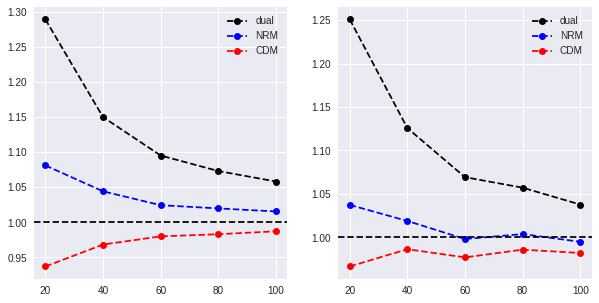

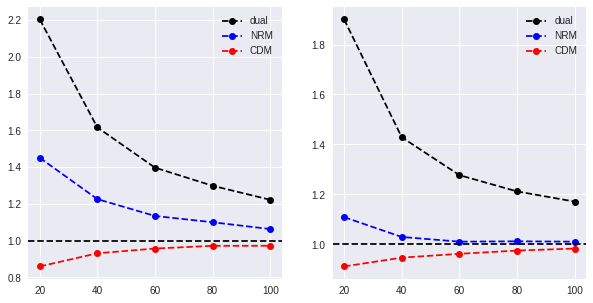

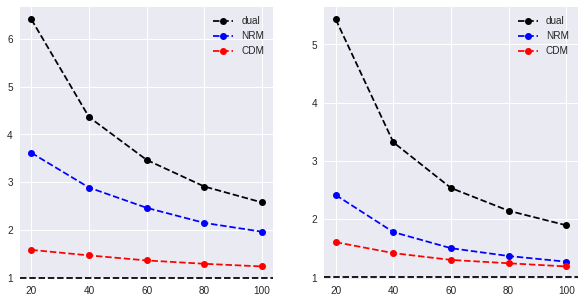

In [0]:
mean = np.zeros((2, len(N), 3, 3))
eig = Sigma_1[:3]
for k in range(2):
    for i in range(3):
        mean[k, :, :, i] = result_mean[k, :, :, i] / eig[i]

color_list = ['black', 'blue', 'red']
label_list = ['dual', 'NRM', 'CDM']

for i in range(3):
    plt.figure(figsize=(10, 5))
    for k in range(2):
        plt.subplot(1, 2, k+1)
        for j in range(3):
            plt.plot(N, mean[k, :, j, i], 'o--', color=color_list[j], label=label_list[j])
        plt.axhline(y=1, color='black', linestyle='dashed')
        plt.legend()


# Function

In [0]:
import numpy as np
import numpy.linalg as la


class function:
        
        
################################ prepare ########################################################
    
            
    def eig_sort(self, S):
        value, vec = la.eig(S)
        idx = value.argsort()[::-1]
        P = value[idx]
        Q = vec.T[idx]

        return (P, Q.T)
    
    
    
    def  svd_sort(self, S):
        vec_r, value, vec_l = la.svd(S)
        idx = value.argsort()[::-1]
        P = value[idx]
        Q_r = vec_r.T[idx]
        Q_l = vec_l.T[idx]
        
        return (Q_r.T, P, Q_l.T)
 


    def data(self, X, bias=False):
        self.bias = bias
        self.N, self.D = X.shape
        self.X = X
        if bias == False:
            self.mean = np.array([np.mean(self.X, axis=0)]*self.N)
            self.S = np.dot(self.X - self.mean, (self.X - self.mean).T) / (self.N - 1)
            self.value, self.vec = self.eig_sort(self.S)
        
        elif bias == True:
            self.S = np.dot(self.X, self.X.T) / self.N
            self.value, self.vec = self.eig_sort(self.S)
    
    
    
    def sign_ad(self, Z): 
        X = Z.T[:self.N+1]
        Y = self.vec.T[:self.N+1]
        for i in range(self.N):
            sign = np.dot(X[i], Y[i])
            if sign < 0:
                Y[i] = - Y[i]

        return Y.T
    
    
    
    def P(self):
        one = np.array([1 for i in range(self.N)])
        mat = np.eye(self.N) - np.einsum('i, j -> ij', one, one) / self.N
        return mat
    
    
    
###################### check SSE Model ###############################
   
    def check_sse(self):
        value = self.CDM_value()
        SDcross = self.SDcross
        phi, tau = [0]*self.n2, [0]*self.n2
        
        def kappa(n):
            return np.sqrt((n**(-1) * np.log(n)))
    
        for j in range(self.n2):
            phi[j] = np.trace(np.dot(SDcross, SDcross.T)) - np.sum(value[i]**2 for i in range(j))
        
        for j in range(self.n2 - 1):
            tau[j] = phi[j + 1] / phi[j]
            if tau[j] * (1 + (j + 1) * kappa(self.N)) > 1:
                mhat = j - 1
                break
                
        mhat = np.min([mhat, self.n2 - 3])
        
        return mhat
    
    
    
######################## estimation of eigen vector ########################
    
    def et_vec(self, value, M):
        
        vec = np.zeros((self.D, M))    
        value = value[:M+1]
        
        if self.bias == False:
            for m in range(M):
                vec.T[m] = np.dot(self.vec.T[m], self.X - self.mean) / np.sqrt((self.N - 1) * value[m])
                
        if self.bias == True:
            for m in range(M):
                vec.T[m] = np.dot(self.vec.T[m], self.X) / np.sqrt(self.N * value[m])
                
        return vec         
    
    
    
    
################################ projection matrix #########################################

    def prj(self, vec, M):
        prj = np.eye(self.D) - np.sum(np.einsum('i, j -> ij', vec.T[i], vec.T[i]) for i in range(M))
        return prj


    
######################################### dual covariance matrix #######################################
    def dual(self):
        return (self.value, self.vec)
    
    def dual_value(self):
        return self.value
    
    
    
########################################### noise-reduction ##############################################
    
    def NRM_value(self): 
        value = np.zeros(self.N)
        
        if self.bias == False:
            for j in range(self.N - 2):
                value[j] = self.value[j] - (np.trace(self.S) - np.sum(self.value[0 :(j+1)])) / (self.N - j - 2)
        
        elif self.bias == True:
            for j in range(self.N - 1):
                value[j] = self.value[j] - (np.trace(self.S) - np.sum(self.value[0 :(j+1)])) / (self.N - j - 1)
            
        return value
    
    
    
    def NRM(self): 
        M = self.check_sse()
        value = self.NRM_value()
        
        spiked_vec = et_vec(velue, M)
        prj = self.prj(spiked_vec, M)
        
        return (value, spiked_vec, prj, M)
    
    
   
               
        
####################################### cross-data-methodology #############################################
        
    
    def CDM_value(self):
        value = np.zeros(self.N)

        n1 = int(np.ceil(self.N / 2))
        n2 = self.N - n1
        self.n2 = n2
        X1, X2 = self.X[:n1], self.X[-n2:]
        
        if self.bias == False:    
            mean1 = np.array([np.mean(X1, axis=0)] * n1)
            mean2 = np.array([np.mean(X2, axis=0)] * n2)
            
            self.SDcross = np.dot(X1 - mean1, (X2 - mean2).T) / np.sqrt((n1 - 1) * (n2 - 1))
            value = self.svd_sort(self.SDcross)[1]
            
        if self.bias == True:
            self.SDcross = np.dot(X2, X1.T) / np.sqrt(n1 * n2)
            value = self.svd_sort(self.SDcross)[1]
            
        return value
    
    
    
    
    def CDM(self):
        M = self.check_sse()
        value = self.CDM_value()
        
        spiked_vec = et_vec(value, M)
        prj = self.prj(spiked_vec, M)
        
        return (value, spiked_vec, prj, M)
    
    
    
    

        



############################### estiomation of tr(Sigma^2) #################################
    
    
    
    def ECDM(self, X):
        n = []
        n.append(int(np.ceil(self.N / 2)))
        n.append(self.N - n[0])

        K = [i for i in range(3, 2*self.N)]
        index =  [i for i in range(len(K))]


        V = [[], []]
        Y = np.zeros((2, len(K), self.D))
        for k, pc in zip(K, index):
            dv = int(np.floor(k / 2))

            if dv < n[0]:
                V[0].append([i for i in range(dv)] + [i for i in range(dv + n[1], self.N)])  
            else:
                V[0].append([i for i in range(dv - n[0], dv)])

            if dv <= n[0]:
                V[1].append([i for i in range(dv, dv + n[1])])
            else:
                V[1].append([i for i in range(dv - n[0])] + [i for i in range(dv, self.N)])

            for i in range(2):
                Y[i, pc] = np.sum(X[V[i][pc]], axis=0) / n[i]

        w = 0
        for j in range(N):
            for i in range(j):
                w += np.dot(X[i] - Y[0][i + j - 1], X[j] - Y[1][i + j - 1]) ** 2

        u =  n[0] * n[1] / ((n[0] - 1) * (n[1] - 1))
        W = 2 * u / (N * (N - 1)) * w

        return W